# 1. Obtain a large regression database. 


In [1]:
import pandas as pd

df = pd.read_csv('./StudentPerformanceFactors.csv')
def assign_grade(score):
    if score >= 80:
        return 'A'
    elif 70 <= score < 80:
        return 'B'
    elif 60 <= score < 70:
        return 'C'
    elif 50 <= score < 60:
        return 'D'
    else:
        return 'F'

print("Rows with null values before processing:", df.isnull().any(axis=1).sum())
df['Grade'] = df['Exam_Score'].apply(assign_grade)
df['Teacher_Quality'] = df['Teacher_Quality'].fillna('Medium')
df = df.dropna(subset=['Distance_from_Home', 'Parental_Education_Level'])
print("Rows with null values after processing:", df.isnull().any(axis=1).sum())

df.head()


Rows with null values before processing: 229
Rows with null values after processing: 0


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Grade
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Medium,Public,Positive,3,No,High School,Near,Male,67,C
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Medium,Public,Negative,4,No,College,Moderate,Female,61,C
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,B
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71,B
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,High,Public,Neutral,4,No,College,Near,Female,70,B


We are adding a column name Grade to convert Exam Scores into grades (A,B,C...). As we are instructed to use classification model, we are converting this data frame accordingly. 

# 2. Provide a description of the dataset used 
including explanation of variousfeatures.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6450 entries, 0 to 6606
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6450 non-null   int64 
 1   Attendance                  6450 non-null   int64 
 2   Parental_Involvement        6450 non-null   object
 3   Access_to_Resources         6450 non-null   object
 4   Extracurricular_Activities  6450 non-null   object
 5   Sleep_Hours                 6450 non-null   int64 
 6   Previous_Scores             6450 non-null   int64 
 7   Motivation_Level            6450 non-null   object
 8   Internet_Access             6450 non-null   object
 9   Tutoring_Sessions           6450 non-null   int64 
 10  Family_Income               6450 non-null   object
 11  Teacher_Quality             6450 non-null   object
 12  School_Type                 6450 non-null   object
 13  Peer_Influence              6450 non-null   object
 1

The dataset has 21 columns and 6450 entries. The columns consist of both numerical and categorical data.
Below is a description of the dataset:

Dataset Summary:
Rows (Entries): 6450
Columns: 21
Data Types:
Numerical columns: 7 columns (int64 type)
Categorical columns: 14 columns (object type)
Columns:
Hours_Studied: (int64) Number of hours each student studied.
Attendance: (int64) Attendance percentage of each student.
Parental_Involvement: (object) Level of parental involvement (e.g., Low, Medium, High).
Access_to_Resources: (object) Access to study resources (e.g., Low, Medium, High).
Extracurricular_Activities: (object) Participation in extracurricular activities (e.g., Yes, No).
Sleep_Hours: (int64) Average number of sleep hours per day.
Previous_Scores: (int64) Scores in previous exams.
Motivation_Level: (object) Motivation level of students (e.g., Low, Medium, High).
Internet_Access: (object) Whether the student has internet access (e.g., Yes, No).
Tutoring_Sessions: (int64) Number of tutoring sessions attended.
Family_Income: (object) Family income level (e.g., Low, Medium, High).
Teacher_Quality: (object) Perception of teacher quality (e.g., Low, Medium, High).
School_Type: (object) Type of school (e.g., Public, Private).
Peer_Influence: (object) Peer influence level (e.g., Negative, Neutral, Positive).
Physical_Activity: (int64) Physical activity (measured as hours per week).
Learning_Disabilities: (object) Indicates whether the student has learning disabilities (e.g., Yes, No).
Parental_Education_Level: (object) Parents' education level (e.g., High School, College, Postgraduate).
Distance_from_Home: (object) Distance from school to home (e.g., Near, Moderate, Far).
Gender: (object) Gender of the student (e.g., Male, Female).
Exam_Score: (int64) The score the student achieved in the exam (target variable).
Grade: (object) The student's grade level (e.g., A, B, C, etc.).

In [3]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6450.000000,6450.000000,6450.000000,6450.000000,6450.000000,6450.000000,6450.000000
mean,19.975504,79.995504,7.033953,75.091938,1.496124,2.971938,67.246512
std,5.991338,11.551491,1.468413,14.391781,1.233255,1.028507,3.904148
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


# 3. Pre-process and clean the dataset as appropriate.

In [3]:
# List of columns for one-hot encoding (nominal variables)
nominal_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level',
                'Internet_Access', 'School_Type', 'Peer_Influence', 'Parental_Education_Level', 'Gender']

# One-Hot Encoding with get_dummies
df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# List of ordinal columns for Label Encoding
ordinal_cols = ['Teacher_Quality', 'Learning_Disabilities', 'Distance_from_Home', 'Family_Income']

# Label Encoding with astype('category').cat.codes
for col in ordinal_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Display the processed dataframe
df_encoded.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Family_Income,Teacher_Quality,Physical_Activity,Learning_Disabilities,Distance_from_Home,...,Extracurricular_Activities_Yes,Motivation_Level_Low,Motivation_Level_Medium,Internet_Access_Yes,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Gender_Male
0,23,84,7,73,0,1,2,3,0,2,...,0,1,0,1,1,0,1,1,0,1
1,19,64,8,59,2,2,2,4,0,1,...,0,1,0,1,1,0,0,0,0,0
2,24,98,7,91,2,2,2,4,0,2,...,1,0,1,1,1,1,0,0,1,1
3,29,89,8,98,1,2,2,4,0,1,...,1,0,1,1,1,0,0,1,0,1
4,19,92,6,65,3,2,0,4,0,2,...,1,0,1,1,1,1,0,0,0,0


In [4]:
print(df_encoded[['Exam_Score']].head())

   Exam_Score
0          67
1          61
2          74
3          71
4          70


In [5]:
df_model_1 = df_encoded.drop(columns=['Grade'])

For now we are dropping grade which is a categorical variable that was created earlier. I will be running regression model using Exam Score as a continuos varible. 

In [6]:
df_model_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6450 entries, 0 to 6606
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          6450 non-null   int64
 1   Attendance                             6450 non-null   int64
 2   Sleep_Hours                            6450 non-null   int64
 3   Previous_Scores                        6450 non-null   int64
 4   Tutoring_Sessions                      6450 non-null   int64
 5   Family_Income                          6450 non-null   int8 
 6   Teacher_Quality                        6450 non-null   int8 
 7   Physical_Activity                      6450 non-null   int64
 8   Learning_Disabilities                  6450 non-null   int8 
 9   Distance_from_Home                     6450 non-null   int8 
 10  Exam_Score                             6450 non-null   int64
 11  Parental_Involvement_Low      

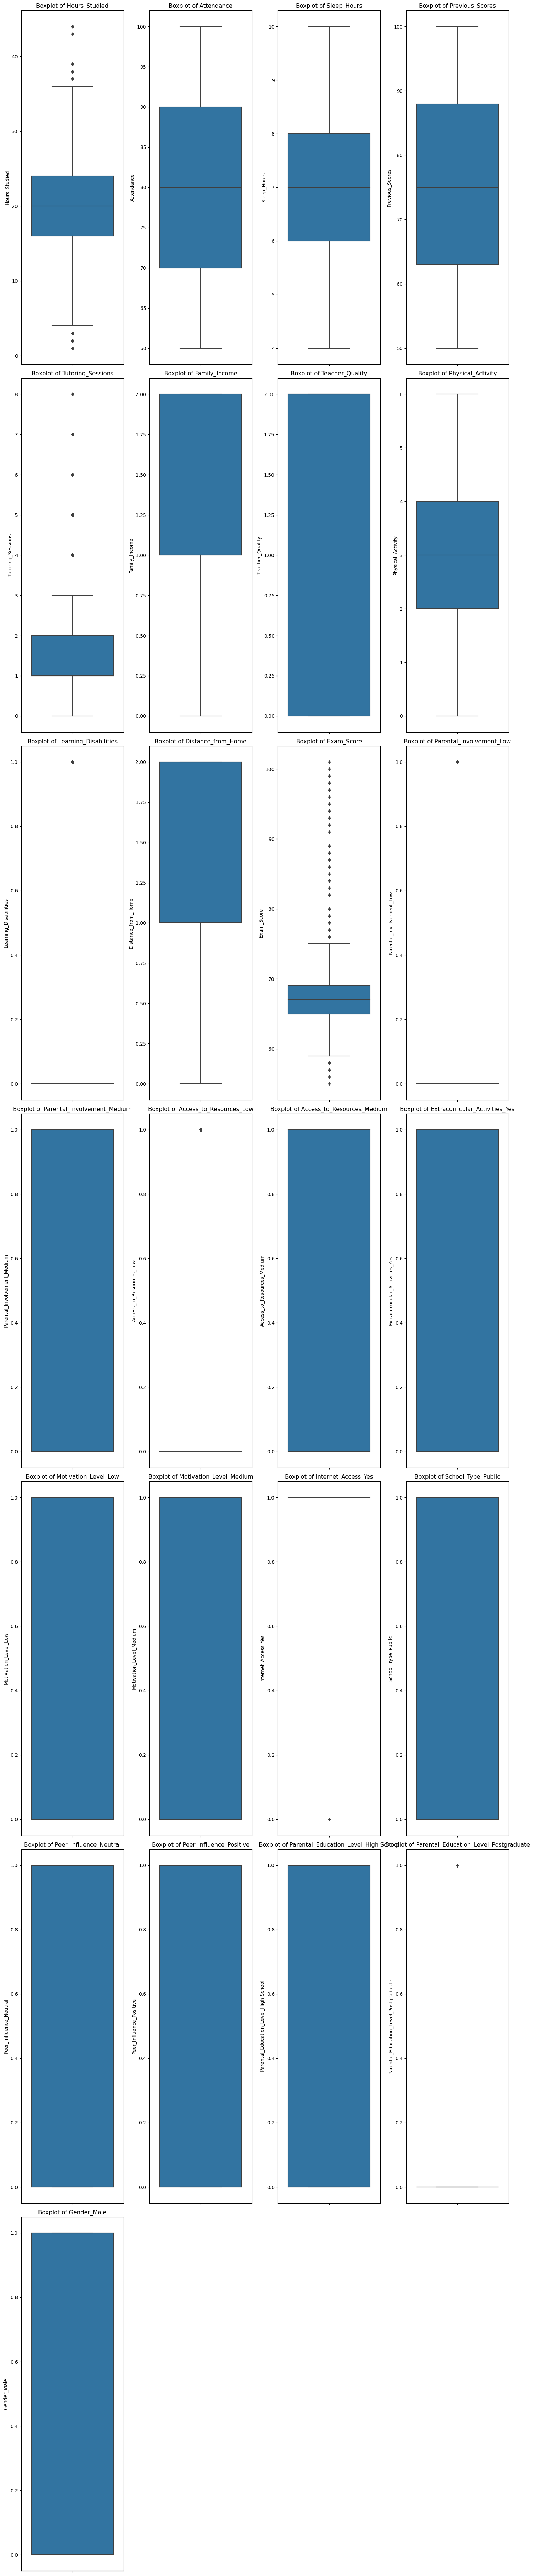

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to automatically plot all features
def plot_all_features(df_model_1):
    # Since all features are now numeric (int64, int8, uint8), treat them as numeric
    numeric_cols = df_model_1.columns
    
    # Set up the figure for plotting
    plt.figure(figsize=(15, len(numeric_cols) * 3))
    
    # Loop through each column and plot its distribution using histograms/boxplots
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot((len(numeric_cols) // 4) + 1, 4, i)
        sns.boxplot(y=df_model_1[col])  # Use boxplot to check for outliers
        plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot all features in the dataset
plot_all_features(df_model_1)

# Additional explaination of data:
Box Plots (for Numerical Features):
Hours_Studied: Shows the spread of study hours, with a few outliers where students studied significantly more or less.
Attendance: Most students have mid-to-high attendance, with some outliers having much lower attendance.
Sleep_Hours: The number of sleep hours seems fairly balanced with no extreme outliers.
Previous_Scores: A wide range of previous scores, indicating significant variation in past performance.
Tutoring_Sessions: Some students attended more tutoring sessions than others, with a few outliers.
Physical_Activity: The range of physical activity hours varies, with a few outliers indicating students who did more.
Exam_Score: This shows the distribution of exam scores, with several outliers indicating students who scored unusually high or low.
Bar Plots (for Categorical Features):
Parental_Involvement: Most students fall into a particular category of parental involvement (either low, medium, or high).
Access_to_Resources: The distribution between different levels of access to resources (e.g., Low, Medium) is shown.
Extracurricular_Activities: Indicates how many students participate in extracurricular activities (Yes/No).
Motivation_Level: Displays the breakdown of students by motivation level (Low, Medium, High).
Internet_Access: Shows whether students have internet access (Yes/No).
Family_Income: Indicates the family income levels (Low, Medium, High).
Teacher_Quality: Breakdown of teacher quality perceptions (Low, Medium, High).
School_Type: Displays whether the student attends a public or private school.
Peer_Influence: Shows peer influence (Negative, Neutral, Positive).
Learning_Disabilities: Indicates whether students have learning disabilities (Yes/No).
Parental_Education_Level: Distribution of parental education levels (High School, College, Postgraduate).
Distance_from_Home: Indicates how far students live from school (Near, Moderate, Far).
Gender: Shows the gender distribution (Male/Female).
Grade: Distribution of students across different grade levels (A, B, C, etc.).
Interpretation:
Box plots: Visualize the spread and potential outliers in the numerical data (e.g., Hours Studied, Exam Scores).
Bar plots: Provide the distribution of categories (e.g., Gender, School Type, Motivation Level) and help understand the proportions across different groups.

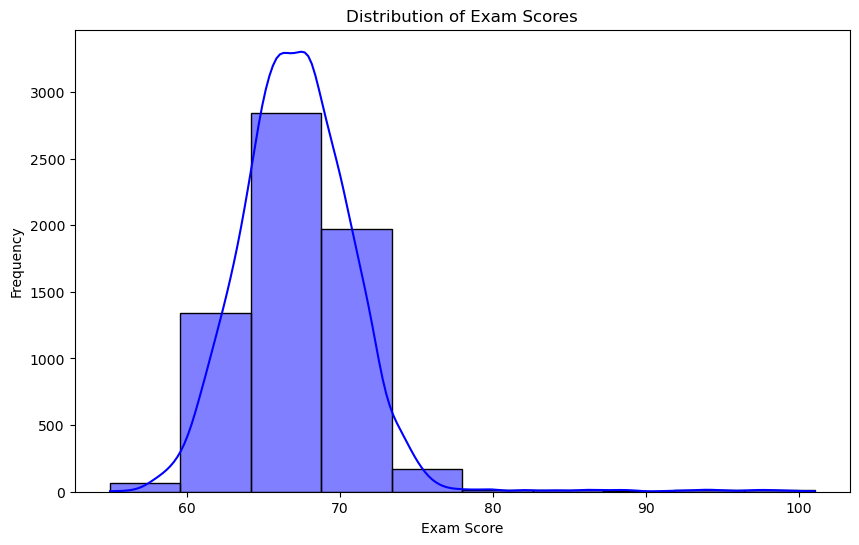

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df_model_1['Exam_Score'], bins=10, kde=True, color='blue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

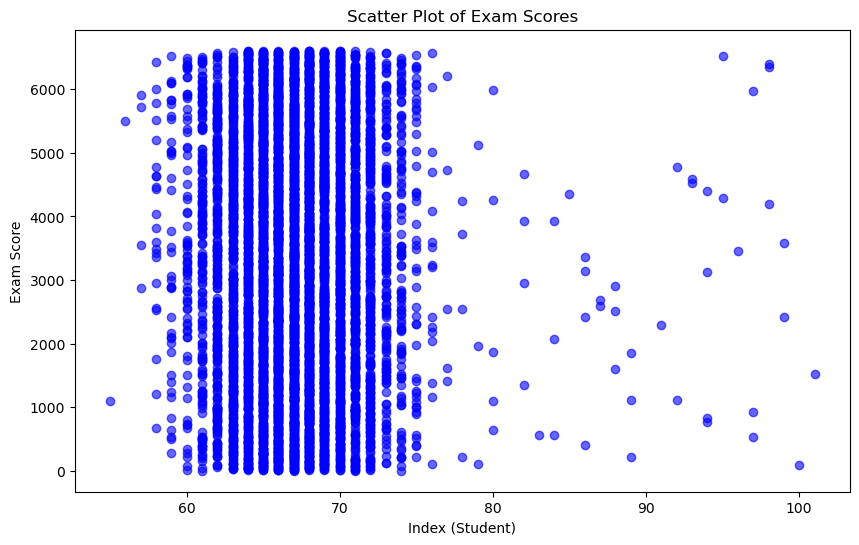

In [9]:
plt.figure(figsize=(10, 6))

# Use index as the x-axis (since scatter plot requires two variables) and Exam_Score as y-axis
plt.scatter(df_model_1['Exam_Score'], df_model_1.index, color='blue', alpha=0.6)

# Add labels and title
plt.title('Scatter Plot of Exam Scores')
plt.xlabel('Index (Student)')
plt.ylabel('Exam Score')

# Show the plot
plt.show()

Looks like there is a outlier in the exam score. One of the student got more than 100. We are removing it. 


In [10]:
df_model_1= df_model_1[df_model_1['Exam_Score'] <= 100]

# Verifying if the outlier is removed
outliers_removed = df_model_1[df_model_1['Exam_Score'] > 100]
print(outliers_removed)  # This should return an empty DataFrame if the outlier is removed


Empty DataFrame
Columns: [Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Family_Income, Teacher_Quality, Physical_Activity, Learning_Disabilities, Distance_from_Home, Exam_Score, Parental_Involvement_Low, Parental_Involvement_Medium, Access_to_Resources_Low, Access_to_Resources_Medium, Extracurricular_Activities_Yes, Motivation_Level_Low, Motivation_Level_Medium, Internet_Access_Yes, School_Type_Public, Peer_Influence_Neutral, Peer_Influence_Positive, Parental_Education_Level_High School, Parental_Education_Level_Postgraduate, Gender_Male]
Index: []

[0 rows x 25 columns]


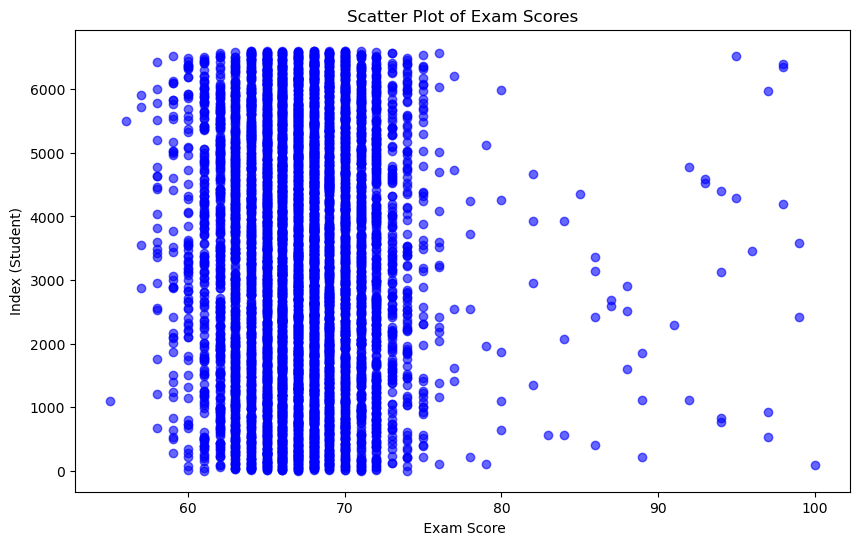

In [11]:
plt.figure(figsize=(10, 6))

# Use index as the x-axis (since scatter plot requires two variables) and Exam_Score as y-axis
plt.scatter(df_model_1['Exam_Score'], df_model_1.index, color='blue', alpha=0.6)

# Add labels and title
plt.title('Scatter Plot of Exam Scores')
plt.xlabel(' Exam Score')
plt.ylabel('Index (Student)')

# Show the plot
plt.show()

# 4 Random Forest without hyperparameter tuning

In [12]:
import sklearn as sk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [13]:
X = df_model_1.drop(columns = ['Exam_Score'])
y = df_model_1['Exam_Score']

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)

#Train model

rf_model.fit(X_train, y_train)

#predict/run model

y_predict = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"mean squared erro : {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')


mean squared erro : 5.969229457364342
Root Mean Squared Error (RMSE): 2.443200658432365
Mean Absolute Error (MAE): 1.2070077519379845
R-squared (R²): 0.6030684454951077


# First run results:

mean squared erro : 5.969229457364342
Root Mean Squared Error (RMSE): 2.443200658432365
Mean Absolute Error (MAE): 1.2070077519379845
R-squared (R²): 0.6030684454951077

# Random Forest with hyperparameter tuning (GridSearchCV)

In [14]:
# Define a parameter
param_grid = {
    'n_estimators' : [10, 50, 100],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1,2,4],
    'max_depth': [10, 20, 30, None],
    'bootstrap': [True, False]
}

#initializing grid search

grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 2, scoring = 'neg_mean_squared_error')

# fitting grid into data
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_

print(f"Best Hyperparameters : best_params")

best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_predict_g = best_rf_model.predict(X_test)

# Evaluate the model
mseg = mean_squared_error(y_test, y_predict_g)
rmseg = np.sqrt(mse)
maeg = mean_absolute_error(y_test, y_predict_g)
r2g = r2_score(y_test, y_predict_g)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mseg}")
print(f"Root Mean Squared Error (RMSE): {rmseg}")
print(f"Mean Absolute Error (MAE): {maeg}")
print(f"R-squared (R²): {r2g}")





Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s
[CV] END

[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_s

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_sampl

[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_s

[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples

[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, mi

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.9s
[CV] END bootstrap=True, max_depth=None, min_samples_

[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_l

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=

[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, m

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf

[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, 

[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, min_samples_

[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=No

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.1s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=None, min

# 1st run results:
Best Hyperparameters : best_params
Mean Squared Error (MSE): 5.582502356223141
Root Mean Squared Error (RMSE): 2.443200658432365
Mean Absolute Error (MAE): 1.141952264581085
R-squared (R²): 0.6287843591689852

# Can you obtain better results in this step for any of the models? 

The model improved after hyperparameter tuning, especially in terms of reducing MSE and improving R², but the change is relatively small. This indicates that the original model was already quite good, and the hyperparameter tuning made slight improvements.

# 6. Randomly (or based on certain hypothesis) remove some features 

First we want check which features are more important. Random forest has a built in feature importance tool. Assuming removing least importannt feature will imporve the model performance. 

                                  Feature  Importance
1                              Attendance    0.382366
0                           Hours_Studied    0.248455
3                         Previous_Scores    0.092543
4                       Tutoring_Sessions    0.035359
7                       Physical_Activity    0.027520
2                             Sleep_Hours    0.026584
12                Access_to_Resources_Low    0.020092
10               Parental_Involvement_Low    0.018874
9                      Distance_from_Home    0.017266
5                           Family_Income    0.015402
13             Access_to_Resources_Medium    0.010830
22  Parental_Education_Level_Postgraduate    0.010811
21   Parental_Education_Level_High School    0.010500
6                         Teacher_Quality    0.010371
20                Peer_Influence_Positive    0.010336
14         Extracurricular_Activities_Yes    0.009444
11            Parental_Involvement_Medium    0.007953
15                   Motivat

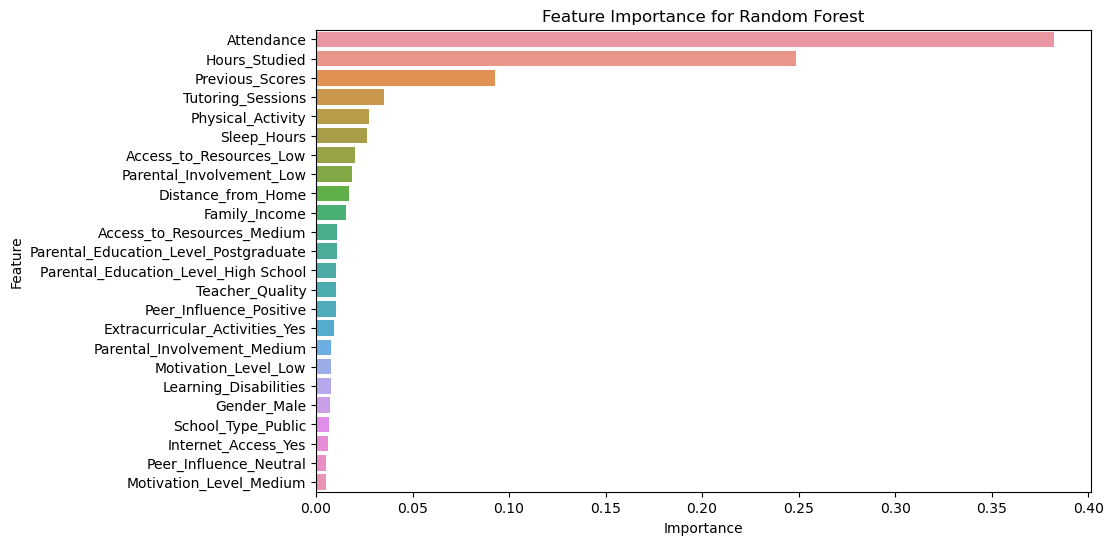

In [16]:
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Random Forest')
plt.show()

Features to Consider Dropping:
Motivation_Level_Medium (Importance: 0.0050)
Peer_Influence_Neutral (Importance: 0.0053)
Internet_Access_Yes (Importance: 0.0062)
School_Type_Public (Importance: 0.0066)
Gender_Male (Importance: 0.0070)

In [17]:
# Dropping the least important features
features_to_drop = ['Motivation_Level_Medium', 'Peer_Influence_Neutral', 'Internet_Access_Yes', 
                    'School_Type_Public', 'Gender_Male']

X_reduced = X.drop(columns=features_to_drop)  # Dropping the selected features

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model_reduced = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model_reduced.fit(X_train, y_train)

# Predict on the test set
y_predict_reduced = rf_model_reduced.predict(X_test)

# Evaluate the model
mse_reduced = mean_squared_error(y_test, y_predict_reduced)
rmse_reduced = np.sqrt(mse_reduced)
mae_reduced = mean_absolute_error(y_test, y_predict_reduced)
r2_reduced = r2_score(y_test, y_predict_reduced)

# Print the evaluation metrics for the reduced model
print(f"Mean Squared Error (MSE): {mse_reduced}")
print(f"Root Mean Squared Error (RMSE): {rmse_reduced}")
print(f"Mean Absolute Error (MAE): {mae_reduced}")
print(f"R-squared (R²): {r2_reduced}")

Mean Squared Error (MSE): 5.933610155038759
Root Mean Squared Error (RMSE): 2.435900276086597
Mean Absolute Error (MAE): 1.187341085271318
R-squared (R²): 0.6054369966026598


# Let's do some hyperparameter tuning on reduced set of features.

In [18]:
X_grid = X.drop(columns=features_to_drop)  # Dropping the selected features
y = df_model_1['Exam_Score']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_grid, y, test_size=0.2, random_state=42)

# Step 3: we are using old param_grid again.


# Step 4: Initialize the RandomForestRegressor
rf_model_grid = RandomForestRegressor(random_state=42)

# Step 5: Perform GridSearchCV to tune hyperparameters
grid_search_n = GridSearchCV(estimator=rf_model_grid, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search_n.fit(X_train, y_train)

# Step 6: Get the best hyperparameters and best model
best_params = grid_search_n.best_params_
print("Best Hyperparameters:", best_params)

# Use the best estimator (model with best hyperparameters) for prediction
best_rf_model = grid_search_n.best_estimator_

# Step 7: Predict on the test set
y_predict_grid = best_rf_model.predict(X_test)

# Step 8: Evaluate the model
mse_grid = mean_squared_error(y_test, y_predict_grid)
rmse_grid = np.sqrt(mse_grid)
mae_grid = mean_absolute_error(y_test, y_predict_grid)
r2_grid = r2_score(y_test, y_predict_grid)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse_grid}")
print(f"Root Mean Squared Error (RMSE): {rmse_grid}")
print(f"Mean Absolute Error (MAE): {mae_grid}")
print(f"R-squared (R²): {r2_grid}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (MSE): 5.563562220159892
Root Mean Squared Error (RMSE): 2.358720462488061
Mean Absolute Error (MAE): 1.1381731323620945
R-squared (R²): 0.6300438077634507


# Analysis:
Best Result: The reduced features with GridSearchCV approach gave us the best performance, with the highest R² (0.63) and the lowest error metrics. This indicates that feature reduction combined with hyperparameter tuning led to the most optimized model.